In [14]:
import pandas as pd #importa a biblioteca pandas
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
path ='C:/Users/dsadm/Desktop/big data/dados_produtos.csv'
df =pd.read_csv(path,sep=',') #comando para ler o arquivo csv da base de dados

In [16]:
df.head() # exibir as primeiras linhas do dataframe

,product_name,rating,rating_count,purchased
0,Televisão,3.04,29,1
1,Celular,3.46,3872,0
2,Cafeteira,3.25,1187,0
3,Televisão,3.77,4097,1
4,Videogame,5.00,4738,1


In [17]:
df.tail() #exibe as ultimas linhas do dataframe


,product_name,rating,rating_count,purchased
95,iPod,4.44,1372,0
96,Celular,4.66,1690,1
97,Televisão,4.33,3364,1
98,Notebook,3.30,1825,1
99,iPod,4.08,533,0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_name  100 non-null    object 
 1   rating        100 non-null    float64
 2   rating_count  100 non-null    int64  
 3   purchased     100 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 3.3+ KB


In [19]:
df.describe()

,rating,rating_count,purchased
count,100.000000,100.000000,100.00
mean,4.056900,2536.670000,0.55
std,0.588344,1458.312544,0.50
min,3.020000,10.000000,0.00
25%,3.580000,1433.250000,0.00
50%,4.105000,2424.000000,1.00
75%,4.505000,3773.000000,1.00
max,5.000000,4977.000000,1.00


c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


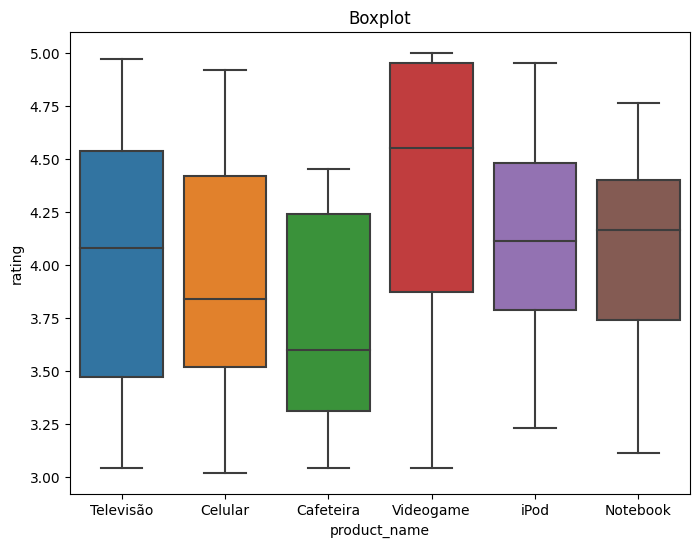

In [22]:
plt.figure(figsize=(8, 6))  
sns.boxplot(x='product_name', y='rating',data=df)  
plt.title('Boxplot')  
plt.xlabel('product_name')  
plt.ylabel('rating')  
plt.show()

In [32]:
df.product_name.value_counts() #Conferindo se a coluna está preechida por completo, para caso tenha valores nulos, nós tratarmos

product_name
Celular      21
Televisão    19
iPod         18
Videogame    17
Notebook     16
Cafeteira     9
Name: count, dtype: int64

In [33]:
df.rating.value_counts() #Conferindo se a coluna está preechida por completo, para caso tenha valores nulos, nós tratarmos

rating
3.04    3
4.24    3
4.68    3
4.42    2
3.76    2
       ..
3.46    1
4.96    1
3.75    1
3.39    1
3.30    1
Name: count, Length: 82, dtype: int64

In [35]:
df.rating_count.value_counts() #Conferindo se a coluna está preechida por completo, para caso tenha valores nulos, nós tratarmos

rating_count
2463    2
29      1
1075    1
2319    1
3901    1
       ..
2544    1
3070    1
4780    1
4965    1
533     1
Name: count, Length: 99, dtype: int64

In [37]:
df.purchased.value_counts() #Conferindo se a coluna está preechida por completo, para caso tenha valores nulos, nós tratarmos

purchased
comprou        55
não comprou    45
Name: count, dtype: int64

In [36]:
df['purchased'] = df['purchased'].map({0: 'não comprou',1:'comprou'})

In [43]:
import numpy as np # importa biblioteca numpy para trabalhar com valores numericos
from sklearn.model_selection import train_test_split # importa a biblioteca sklearn e o metodo para treinamento 
from sklearn.tree import DecisionTreeClassifier # Da sklearn importa a arvore de decisao
from sklearn import tree
from sklearn.metrics import accuracy_score # metricas
from sklearn.metrics import precision_score # metricas
from sklearn.metrics import recall_score # metricas
from sklearn.metrics import f1_score # metricas
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt # matplotlib
import seaborn as sns  # seaborn

In [52]:
x =np.array(df.rating,df.rating_count) #aqui definimos quem é o X

In [53]:
y = np.array(df.purchased) # aqui definimos quem vai ser o y

In [60]:
#dividir treinos e teste reshape reorganizar
x_treino,x_teste,y_treino,y_teste = train_test_split(x.reshape(-1,1),
                                                                         y.reshape(-1,1),
                                                                         test_size= 0.2, random_state=42)

In [61]:
#cria o modelo de Machine Learning
modelo = DecisionTreeClassifier()

In [62]:
modelo.fit(x_treino,y_treino)

DecisionTreeClassifier()

In [63]:
#Treinamento do modelo
y_pred = modelo.predict (x_teste)

In [66]:
y_pred

array(['não comprou', 'não comprou', 'não comprou', 'não comprou',
       'comprou', 'não comprou', 'não comprou', 'comprou', 'não comprou',
       'comprou', 'não comprou', 'comprou', 'comprou', 'não comprou',
       'comprou', 'comprou', 'comprou', 'comprou', 'não comprou',
       'não comprou'], dtype=object)

In [68]:
dados = df['product_name']=='Televisão'

In [69]:
dados

0      True
1     False
2     False
3      True
4     False
      ...  
95    False
96    False
97     True
98    False
99    False
Name: product_name, Length: 100, dtype: bool